In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor


In [2]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)

df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','Worldwide Gross ($)','IMDB score','IMDB votes','IMDB ID',
'Mojo ID','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic','Budget'],axis=1,inplace=True)

df.fillna(df.median(),inplace=True)

df.drop('Year',axis=1,inplace=True)




In [3]:
df.head()

,Opening ($),Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,...,country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($)
0,77025481.0,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,749766139.0
1,110307189.0,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,415004880.0
2,116101023.0,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334191110.0
3,128122480.0,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,312433331.0
4,64832191.0,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300531751.0


In [4]:
X=df.drop('Domestic Gross ($)',axis=1).to_numpy()
Y=df['Domestic Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)
Y=np.log10(Y)


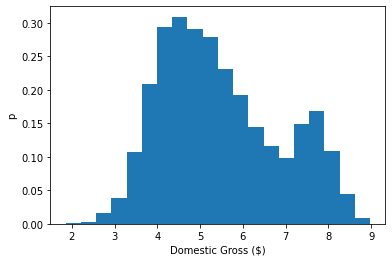

In [5]:
plt.hist(Y,bins=20,density=True)
plt.xlabel('Domestic Gross ($)')
plt.ylabel('p')
plt.show()

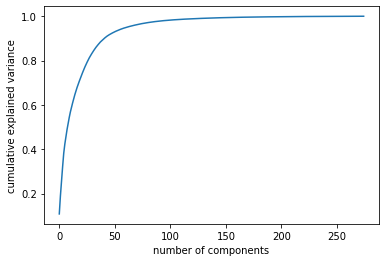

In [6]:
pca=PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [7]:
for index,item in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if item>0.999:
        index=index
        break

In [8]:
pca_f=PCA(index)
X_pca = pca_f.fit_transform(X)
X_pca.shape

(7096, 226)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [10]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

-1.2992373747469671e+21

In [290]:
from tensorflow import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [25]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 2208      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 45        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6         
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [27]:
%%time
history = model.fit(x_train, y_train, epochs=500, batch_size=100,  verbose=1, validation_split=0.2)

Epoch 1/500
43/43 [==============================] - 1s 8ms/step - loss: 29.5548 - mse: 29.5548 - val_loss: 23.3794 - val_mse: 23.3794
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 22.0968 - mse: 22.0968 - val_loss: 16.9673 - val_mse: 16.9673
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 18.4190 - mse: 18.4190 - val_loss: 12.2110 - val_mse: 12.2110
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 14.8939 - mse: 14.8939 - val_loss: 8.7205 - val_mse: 8.7205
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 12.5968 - mse: 12.5968 - val_loss: 6.2884 - val_mse: 6.2884
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 10.4902 - mse: 10.4902 - val_loss: 4.5511 - val_mse: 4.5511
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 9.4724 - mse: 9.4724 - val_loss: 3.5282 - val_mse: 3.5282
Epoch 8/500
43/43 [==============================] - 0s 2ms/step 

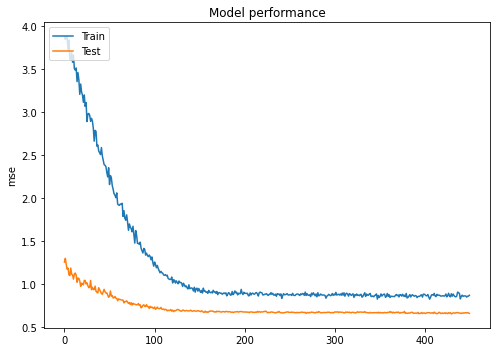

In [28]:
# Plot training & validation accuracy values
ns=50
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, title = 'Model performance', ylabel= 'mse')
plt.plot(history.history['loss'][ns:])
plt.plot(history.history['val_loss'][ns:])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import r2_score
print(f'r2 score on train:{r2_score(y_train,model.predict(x_train))}')
print(f'r2 score on test:{r2_score(y_test,model.predict(x_test))}')

r2 score on train:0.6976036999448256
r2 score on test:0.6519454782150497


In [32]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu',kernel_regularizer=ks.regularizers.l2(0.05)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 2208      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 45        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [33]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [34]:
%%time
history = model.fit(x_train, y_train, epochs=700, batch_size=100,  verbose=1, validation_split=0.2)

Epoch 1/700
43/43 [==============================] - 1s 6ms/step - loss: 29.9285 - mse: 29.7052 - val_loss: 25.0184 - val_mse: 24.8810
Epoch 2/700
43/43 [==============================] - 0s 2ms/step - loss: 23.5269 - mse: 23.3953 - val_loss: 16.5891 - val_mse: 16.4631
Epoch 3/700
43/43 [==============================] - 0s 2ms/step - loss: 16.8136 - mse: 16.6859 - val_loss: 9.7860 - val_mse: 9.6521
Epoch 4/700
43/43 [==============================] - 0s 2ms/step - loss: 12.0828 - mse: 11.9470 - val_loss: 5.6952 - val_mse: 5.5567
Epoch 5/700
43/43 [==============================] - 0s 2ms/step - loss: 11.4178 - mse: 11.2805 - val_loss: 4.3028 - val_mse: 4.1720
Epoch 6/700
43/43 [==============================] - 0s 2ms/step - loss: 10.5833 - mse: 10.4557 - val_loss: 4.1305 - val_mse: 4.0113
Epoch 7/700
43/43 [==============================] - 0s 2ms/step - loss: 10.9630 - mse: 10.8466 - val_loss: 3.9630 - val_mse: 3.8545
Epoch 8/700
43/43 [==============================] - 0s 2ms/step 

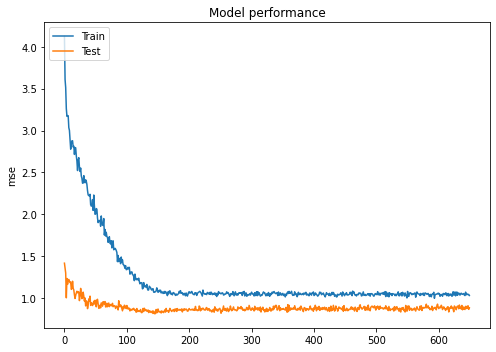

In [35]:
# Plot training & validation accuracy values
ns=50
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, title = 'Model performance', ylabel= 'mse')
plt.plot(history.history['loss'][ns:])
plt.plot(history.history['val_loss'][ns:])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import r2_score
print(f'r2 score on train:{r2_score(y_train,model.predict(x_train))}')
print(f'r2 score on train:{r2_score(y_test,model.predict(x_test))}')

r2 score on train:0.5790457524066772
r2 score on train:0.5631423549967206


## preparing data 

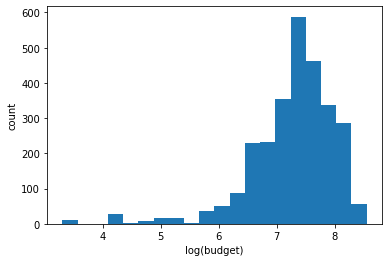

In [456]:

df.drop('Year',axis=1,inplace=True)
X=df[['IMDB score','Opening ($)','IMDB votes','In Realease (Days)','Stars rank']]
Y=df['Budget']

X=X.loc[df['Budget'].dropna().index]
X.fillna(X.mean(),inplace=True)
Y = df['Budget'].dropna().to_numpy()
Y = np.log10(Y)

scaler=MinMaxScaler()
X = scaler.fit_transform(X)
X , Y = shuffle(X,Y)

plt.hist(Y,bins=20)
plt.xlabel('log(budget)')
plt.ylabel('count')
plt.show()


In [457]:
X.shape

(2798, 5)

In [458]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)


In [459]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [463]:
reg.score(x_test,y_test)

0.1510635210974408

In [448]:
df.loc[df['Stars rank'].index[df['Stars rank'].apply(np.isnan)]]

,IMDB ID,Mojo ID,Opening ($),Budget,Opening Theaters,In Realease (Days),Widest Release,Running time (min),IMDB score,IMDB votes,...,Writer(s) rank,Stars rank,Distributor rank,additive Producer(s) rank,additive Director(s) rank,additive Writer(s) rank,additive Stars rank,additive Distributor rank,Domestic Gross ($),Worldwide Gross ($)


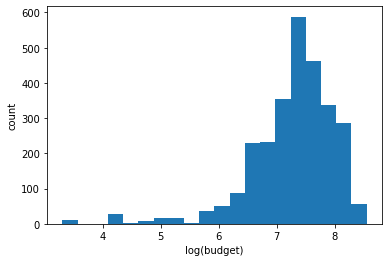

In [368]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank','IMDB ID',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic'],axis=1,inplace=True)



df.drop('Year',axis=1,inplace=True)


#X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)' , 'Budget'],axis=1)

X=X.loc[df['Budget'].dropna().index]
X.fillna(X.mean(),inplace=True)
Y = df['Budget'].dropna().to_numpy()
Y = np.log10(Y)

#index = df['Budget'].index[df['Budget'].apply(np.isnan)]
#x_test = df.loc[index].drop(['Domestic Gross ($)','Worldwide Gross ($)' , 'Budget'],axis=1)

scaler=MinMaxScaler()
X = scaler.fit_transform(X)
X , Y = shuffle(X,Y)

plt.hist(Y,bins=20)
plt.xlabel('log(budget)')
plt.ylabel('count')
plt.show()


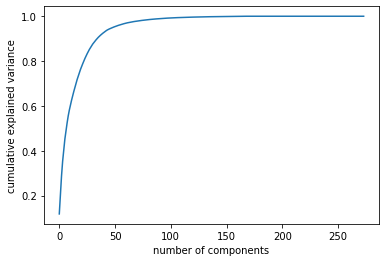

In [369]:
pca=PCA()
pca.fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [370]:
for index,item in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if item>0.99:
        index=index
        break

In [371]:
pca_f=PCA(index)
X_pca = pca_f.fit_transform(X)

In [373]:
X_pca.shape

(2798, 93)

In [374]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,Y)

In [375]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [376]:
reg.score(x_test,y_test)

0.24797459216427076

In [379]:
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train)
poly_test = poly.fit_transform(x_test)

In [383]:
reg=SGDRegressor()
reg.fit(poly_train,y_train)

SGDRegressor()

In [386]:
reg.score(poly_train,y_train)

0.39651667161895987

In [412]:
reg=RandomForestRegressor(max_depth=15,n_estimators=100)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=15)

In [414]:
reg.score(x_train,y_train)

0.8412467561031577

In [409]:
x_train.shape

(2098, 93)

# classification

In [3]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank','IMDB ID',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic','Running time (min)'],axis=1,inplace=True)

#df.fillna(df.mean(),inplace=True)

df.drop('Year',axis=1,inplace=True)
language=[]
country=[]
for item in df.columns:
    if item.split()[0]=='language':
        language.append(item)
    if item.split()[0]=='country':
        country.append(item)

df.drop(country,axis=1,inplace=True)
df.drop(language,axis=1,inplace=True)
df.drop(['Writer(s) rank','Producer(s) rank'],axis=1,inplace=True)
df.dropna(inplace=True)


X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)'],axis=1).to_numpy()
Y=df['Worldwide Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)


In [4]:
df.head()

,Budget,Opening Theaters,genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,genre Drama,...,MPAA Not Rated,MPAA M/PG,MPAA TV-PG,Day,Month,Director(s) rank,Stars rank,Distributor rank,Domestic Gross ($),Worldwide Gross ($)
0,237000000.0,3452.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,12.0,0.0,1.0,1.0,749766139.0,2.744337e+09
1,200000000.0,4028.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,18.0,6.0,0.0,1.0,1.0,415004880.0,1.066970e+09
2,200000000.0,3728.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,334191110.0,1.025467e+09
3,200000000.0,4380.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,5.0,0.0,1.0,1.0,312433331.0,6.239333e+08
4,68000000.0,4468.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,30.0,6.0,0.0,0.0,0.0,300531751.0,6.984913e+08


In [5]:
print(f'X shape: {X.shape} \n Y shape: {Y.shape}')

X shape: (2769, 42) 
 Y shape: (2769,)


In [6]:
for item in df.columns:
    print(item)

Budget
Opening Theaters
genre Action
genre Adventure
genre Fantasy
genre Sci-Fi
genre Animation
genre Comedy
genre Family
genre Drama
genre Romance
genre Thriller
genre Mystery
genre Crime
genre Sport
genre Musical
genre Documentary
genre History
genre Music
genre Biography
genre Horror
genre War
genre Western
genre Short
genre News
genre Film-Noir
genre Reality-TV
genre Adult
MPAA PG-13
MPAA PG
MPAA R
MPAA G
MPAA Unrated
MPAA NC-17
MPAA Not Rated
MPAA M/PG
MPAA TV-PG
Day
Month
Director(s) rank
Stars rank
Distributor rank
Domestic Gross ($)
Worldwide Gross ($)


In [13]:
dic_classification={}

dic_classification['super hit']=df.loc[(df['Budget']>50e6) & (df['Budget']*4<=df['Worldwide Gross ($)'])].index

dic_classification['blockbuster']=df.loc[(df['Budget']>50e6) & (df['Budget']*4>df['Worldwide Gross ($)']) & (df['Budget']*2.5<=df['Worldwide Gross ($)'])].index

dic_classification['minor success']=df.loc[(df['Budget']>50e6) & (df['Budget']*2.5>df['Worldwide Gross ($)']) & (df['Budget']*1.5<=df['Worldwide Gross ($)'])].index

dic_classification['flop']=df.loc[(df['Budget']>50e6) & (df['Budget']*1.5>df['Worldwide Gross ($)']) & (df['Budget']<=df['Worldwide Gross ($)'])].index

dic_classification['box office bomb'] = df.loc[(df['Budget']>50e6) & (df['Budget']>df['Worldwide Gross ($)'])].index

dic_classification['hit'] = df.loc[(df['Budget']<=50e6) & (df['Budget']>1e6) & (df['Budget']*2<=df['Worldwide Gross ($)'])].index

dic_classification['minor success for mid budget'] = df.loc[(df['Budget']<=50e6) & (df['Budget']>1e6) & (df['Budget']*2>df['Worldwide Gross ($)']) & (df['Budget']*1.3<=df['Worldwide Gross ($)'])].index

dic_classification['failure'] = df.loc[(df['Budget']<=50e6) & (df['Budget']>1e6) & (df['Budget']*1.3>df['Worldwide Gross ($)'])].index

dic_classification['great success'] = df.loc[(df['Budget']<=1e6)  & (df['Budget']*2<=df['Worldwide Gross ($)'])].index

dic_classification['success'] = df.loc[(df['Budget']<=1e6)  & (df['Budget']*2>df['Worldwide Gross ($)']) ].index

#dic_classification['big success'] = df.loc[(df['Budget']<=1e6)  & (df['Budget']*2>df['Worldwide Gross ($)']) & (df['Budget']<=df['Worldwide Gross ($)'])].index

#dic_classification['success'] = df.loc[(df['Budget']<=1e6)  &  (df['Budget']>df['Worldwide Gross ($)'])].index


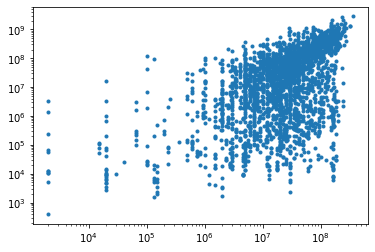

In [8]:
plt.plot(df['Budget'],df['Worldwide Gross ($)'],'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

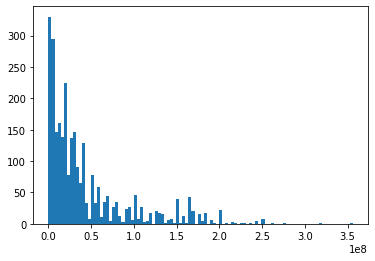

In [9]:
plt.hist(df['Budget'].fillna(df['Budget'].median()),bins=100)
plt.show()

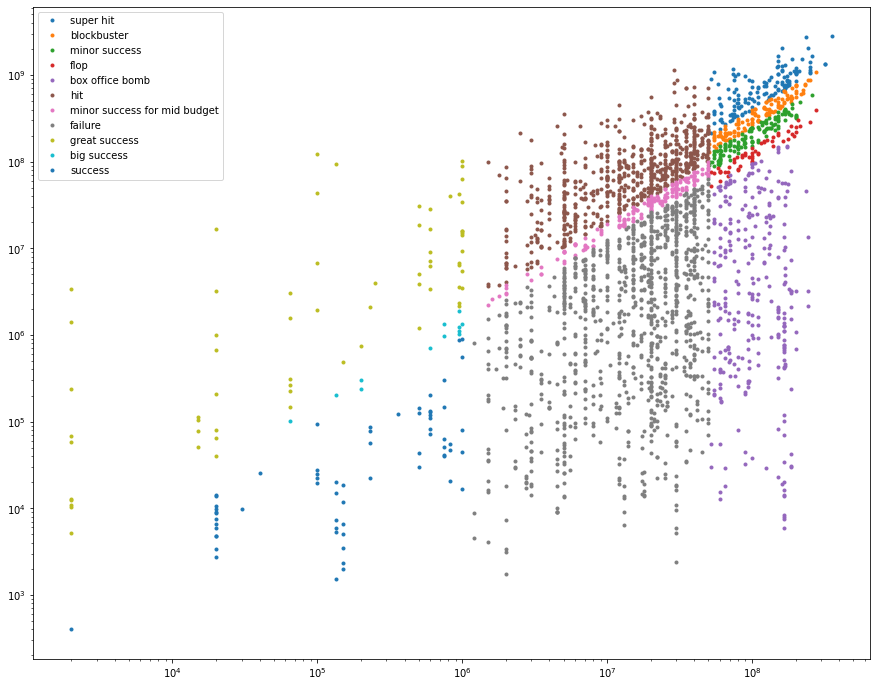

In [10]:
plt.figure(figsize=(15,12))
for key in dic_classification.keys():
    plt.plot(df.loc[dic_classification[key]]['Budget'],df.loc[dic_classification[key]]['Worldwide Gross ($)'],'.',label=key)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

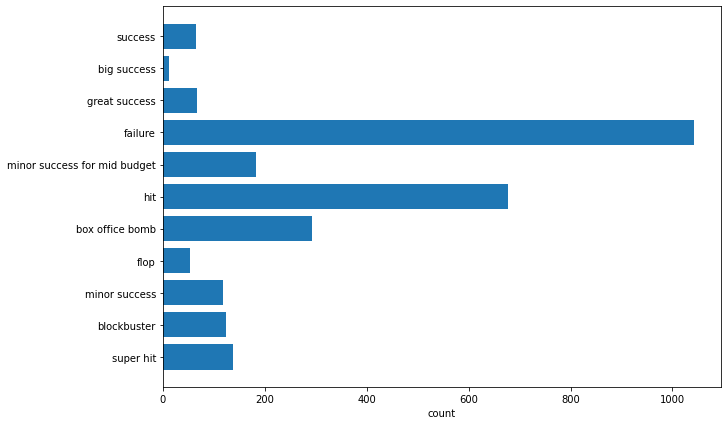

In [11]:
plt.figure(figsize=(10,7))
heights=[len(dic_classification[key]) for key in dic_classification.keys()]
plt.barh(list(dic_classification.keys()),heights)
plt.xlabel('count')
plt.show()

In [12]:
for key in dic_classification.keys():
    print(key,len(dic_classification[key]))

super hit 137
blockbuster 124
minor success 118
flop 53
box office bomb 292
hit 677
minor success for mid budget 182
failure 1043
great success 66
big success 12
success 65


In [508]:
label={key:i for i,key in enumerate(dic_classification.keys())}
for key in dic_classification.keys():
    df.loc[dic_classification[key],'class'] = int(label[key])

In [509]:
label

{'super hit': 0,
 'blockbuster': 1,
 'minor success': 2,
 'flop': 3,
 'box office bomb': 4,
 'hit': 5,
 'minor success for mid budget': 6,
 'failure': 7,
 'great success': 8,
 'big success': 9,
 'success': 10}

In [510]:
df.isnull().values.any()

False

In [511]:
X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)','class'],axis=1).to_numpy()
Y=df['class'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)

In [512]:
print(f'X: {X.shape} \nY: {Y.shape}')

X: (2769, 42) 
Y: (2769,)


In [514]:
Y_oh = ks.utils.to_categorical(Y, num_classes=len(set(Y)), dtype=int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_oh, random_state=0)

In [455]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    #model.add(ks.layers.Flatten(input_shape=(1,11)))

    hp_units = hp.Int('units1', min_value=5, max_value=100, step=5)
    model.add(ks.layers.Dense(units=hp_units, input_dim=42,
                               activation='relu', 
                               kernel_regularizer=ks.regularizers.l2(.05)))

    
    hp_units2 = hp.Int('units2', min_value=5, max_value=100, step=5)
    model.add(Dense(units=hp_units2, activation='relu'))
    model.add(Dense(len(set(Y)), activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [456]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory=os.path.normpath('C:/'),
                     project_name='nn')

In [457]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [459]:
tuner.search(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and for second layers is {best_hps.get('units2')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.6081730723381042

Best val_accuracy So Far: 0.6177884340286255
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 15 and for second layers is 80 and the optimal learning rate for the optimizer
is 0.01.



In [460]:
%%time
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=200, validation_split=0.2,verbose=0)



Wall time: 12.7 s


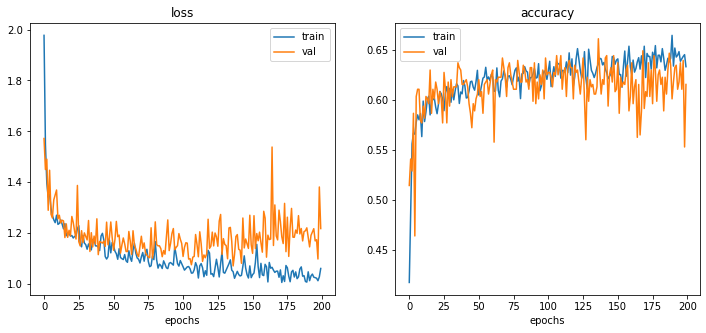

In [461]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])

ax[0].legend(['train','val'])
ax[1].legend(['train','val'])

ax[0].set_title('loss')
ax[1].set_title('accuracy')

ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
plt.show()

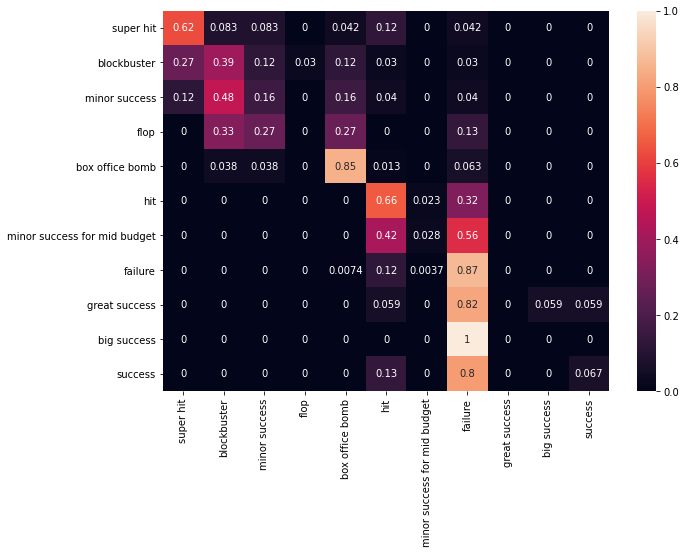

In [462]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(np.argmax( Y_test , axis=1 ), Y_predicted)
vector = cm.sum(axis=1)

cm = cm / vector[:,None]
df_cm = pd.DataFrame(cm, index = [key for key in dic_classification.keys()],
                  columns = [key for key in dic_classification.keys()])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

In [463]:
y_pred=np.argmax( model.predict(X_test) , axis=1 )
print(f'The precision score for each class is {precision_score(np.argmax(Y_test,axis=1),y_pred,average= None,zero_division=True)}')


The precision score for each class is [0.55555556 0.37142857 0.23529412 0.         0.81707317 0.66666667
 0.16666667 0.67236467 1.         0.         0.5       ]


## 3 hidden layered nn 

In [519]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    #model.add(ks.layers.Flatten(input_shape=(1,11)))

    hp_units = hp.Int('units1', min_value=5, max_value=100, step=5)
    model.add(ks.layers.Dense(units=hp_units, input_dim=42,
                               activation='relu', 
                               kernel_regularizer=ks.regularizers.l2(.05)))

    
    hp_units2 = hp.Int('units2', min_value=5, max_value=100, step=5)
    model.add(Dense(units=hp_units2, activation='relu'))

    hp_units3 = hp.Int('units3', min_value=5, max_value=100, step=5)
    model.add(Dense(units=hp_units3, activation='relu',kernel_regularizer=ks.regularizers.l2(.05)))

    model.add(Dense(len(set(Y)), activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [520]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory=os.path.normpath('C:/'),
                     project_name='nn_3')

In [521]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [522]:
tuner.search(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and for second layers is {best_hps.get('units2')} and thirf is {best_hps.get('units3')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 03s]
val_accuracy: 0.5072115659713745

Best val_accuracy So Far: 0.5192307829856873
Total elapsed time: 00h 01m 20s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 70 and for second layers is 40 and thirf is 100 and the optimal learning rate for the optimizer
is 0.01.



## regression problem

In [523]:
df=pd.read_csv('C:/Users/alise/Dropbox/Programming/Machine learning in physics- 2021/Project/Success in movies/Machine-learning-in-physics-Project/Phase 1-Data Collection/Data/final data set.csv',index_col=0)
df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank','IMDB ID',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic','Running time (min)'],axis=1,inplace=True)

#df.fillna(df.mean(),inplace=True)

df.drop('Year',axis=1,inplace=True)
language=[]
country=[]
for item in df.columns:
    if item.split()[0]=='language':
        language.append(item)
    if item.split()[0]=='country':
        country.append(item)

df.drop(country,axis=1,inplace=True)
df.drop(language,axis=1,inplace=True)
df.drop(['Writer(s) rank','Producer(s) rank','Budget'],axis=1,inplace=True)
df.dropna(inplace=True)


X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)'],axis=1).to_numpy()
Y=df['Worldwide Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)
Y=np.log10(Y)

In [524]:
X.shape

(7003, 41)

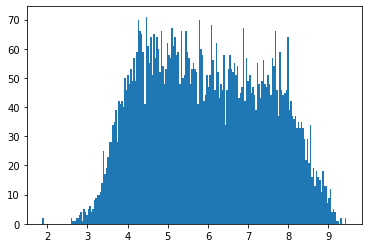

In [526]:
plt.hist(Y,bins=200)
plt.show()

In [527]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [528]:
Y_train

array([4.34401874, 6.27362042, 8.43365815, ..., 5.37801795, 5.67557306,
       4.28431792])

In [575]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    #model.add(ks.layers.Flatten(input_shape=(1,11)))

    hp_units = hp.Int('units1', min_value=5, max_value=50, step=5)
    model.add(ks.layers.Dense(units=hp_units, input_dim=41,
                               activation='relu', 
                               kernel_regularizer=ks.regularizers.l2(.05)))

    
    hp_units2 = hp.Int('units2', min_value=5, max_value=50, step=5)
    model.add(Dense(units=hp_units2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=ks.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mse',
                metrics=['mse'])

    return model

In [579]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory=os.path.normpath('C:/'),
                     project_name='nn_reg')

INFO:tensorflow:Reloading Oracle from existing project C:\nn_reg\oracle.json


In [580]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [581]:
tuner.search(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and for second layers is {best_hps.get('units2')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 04s]
val_loss: 1.1689155101776123

Best val_loss So Far: 1.0936003923416138
Total elapsed time: 00h 01m 33s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and for second layers is 30 and the optimal learning rate for the optimizer
is 0.01.



In [537]:
%%time
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=200, validation_split=0.2,verbose=0)

Wall time: 25.4 s


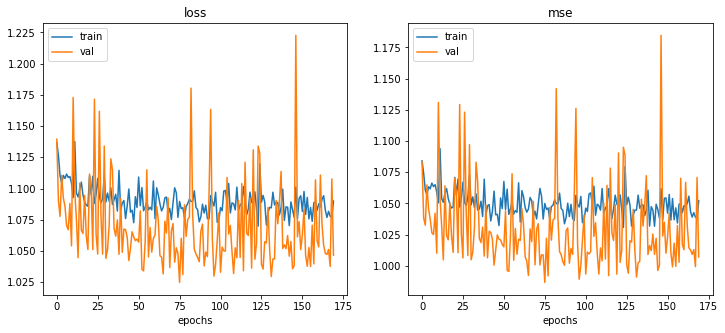

In [582]:
ns=30
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(history.history['loss'][ns:])
ax[0].plot(history.history['val_loss'][ns:])

ax[1].plot(history.history['mse'][ns:])
ax[1].plot(history.history['val_mse'][ns:])

ax[0].legend(['train','val'])
ax[1].legend(['train','val'])

ax[0].set_title('loss')
ax[1].set_title('mse')

ax[0].set_xlabel('epochs')
ax[1].set_xlabel('epochs')
plt.show()

In [585]:
print(f'test r2: {r2_score(Y_test,model.predict(X_test))}\n train r2: {r2_score(Y_train,model.predict(X_train))}')

test r2: 0.50201100933751
 train r2: 0.5453587346631876
